<a href="https://colab.research.google.com/github/DrewRust/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/U1_Build_Week_Final_Kentucky_hawks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# Attempt to install plotly (didn't work)
!pip install plotly

In [0]:
# Attempt to install plotly
import plotly.express as px

In [0]:
# plotly
!pip install chart_studio

In [0]:
# plotly
import chart_studio

In [0]:
# plotly
username = 'drewrust1' # your username
api_key = 'VyKiGpeqryfQnhEiN4op' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [1]:
# WEIRD for some reason unzipping it here gave different results then uzipping it on my computer and then uploading it 
# Not really different but off by a few lines of code I checked it and this code is slightly different.  
# My for loop works but is slightly different.
! wget ftp://ftpext.usgs.gov/pub/er/md/laurel/BBS/DataFiles/States/Kentuck.zip

--2020-03-29 02:35:04--  ftp://ftpext.usgs.gov/pub/er/md/laurel/BBS/DataFiles/States/Kentuck.zip
           => ‘Kentuck.zip’
Resolving ftpext.usgs.gov (ftpext.usgs.gov)... 137.227.224.199, 2001:49c8:8000:120c::199
Connecting to ftpext.usgs.gov (ftpext.usgs.gov)|137.227.224.199|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/er/md/laurel/BBS/DataFiles/States ... done.
==> SIZE Kentuck.zip ... 884591
==> PASV ... done.    ==> RETR Kentuck.zip ... done.
Length: 884591 (864K) (unauthoritative)

Kentuck.zip         100%[===================>] 863.86K   443KB/s    in 1.9s    

2020-03-29 02:35:08 (443 KB/s) - ‘Kentuck.zip’ saved [884591]



In [2]:
! unzip Kentuck.zip

Archive:  Kentuck.zip
  inflating: Kentuck.csv             


In [6]:
url = 'Kentuck.csv'
Kentuck_df = pd.read_csv(url)
Kentuck_df.head(3)

,RouteDataID,CountryNum,StateNum,Route,RPID,Year,AOU,Count10,Count20,Count30,Count40,Count50,StopTotal,SpeciesTotal
0,6167510,840,39,1,101,1966,1310,0,1,0,0,0,1,1
1,6167510,840,39,1,101,1966,2890,0,2,3,8,6,16,19
2,6167510,840,39,1,101,1966,3131,0,0,6,0,0,6,6


In [0]:
# COOPER'S HAWK
coop_bird_all_yrs = Kentuck_df[(Kentuck_df.AOU == 3330)]
# SORT BY year from 1966 to present
coop_sorted_df = coop_bird_all_yrs.sort_values(by='Year', ascending=True)

In [0]:
# Have to reset index on new df
coop_sorted_df = coop_sorted_df.reset_index(drop=True)

In [0]:
# This makes the index a column which I'll need later for my for loop
coop_sorted_df.reset_index(level=0, inplace=True)

In [10]:
coop_sorted_df.tail(3)

,index,RouteDataID,CountryNum,StateNum,Route,RPID,Year,AOU,Count10,Count20,Count30,Count40,Count50,StopTotal,SpeciesTotal
216,216,6367740,840,39,6,101,2018,3330,0,1,0,0,0,1,1
217,217,6367813,840,39,28,101,2018,3330,0,0,0,0,1,1,1
218,218,6370194,840,39,134,101,2018,3330,0,0,0,1,0,1,1


In [0]:
coop_sorted_df.isnull().sum()

RouteDataID     0
CountryNum      0
StateNum        0
Route           0
RPID            0
Year            0
AOU             0
Count10         0
Count20         0
Count30         0
Count40         0
Count50         0
StopTotal       0
SpeciesTotal    0
dtype: int64

In [11]:
# Should be 219
coop_sorted_df.shape

(219, 15)

In [0]:
# Getting sums for some of the years to check my for loop later
total_nin_six_six = coop_sorted_df.Year == 1966
total_two_thou = coop_sorted_df.Year == 2000
total_two_thou_eigh = coop_sorted_df.Year == 2008
total_two_svteen = coop_sorted_df.Year == 2017
total_two_eig_teen = coop_sorted_df.Year == 2018

In [0]:
# getting sums of years above
species_tot_nin_six_six = coop_sorted_df[total_nin_six_six]
species_tot_two_thou = coop_sorted_df[total_two_thou]
species_tot_two_thou_eight = coop_sorted_df[total_two_thou_eigh]
species_tot_two_svn = coop_sorted_df[total_two_svteen]
species_tot_two_eig_teen = coop_sorted_df[total_two_eig_teen ]

In [27]:
# getting sums of years above 
# should be 3 = 1966, 9 = 2000, 13 = 2008, 8 = 2017, 14 = 2018
print(species_tot_nin_six_six['SpeciesTotal'].sum(axis=0))
print(species_tot_two_thou['SpeciesTotal'].sum(axis=0))
print(species_tot_two_thou_eight['SpeciesTotal'].sum(axis=0))
print(species_tot_two_svn['SpeciesTotal'].sum(axis=0))
print(species_tot_two_eig_teen['SpeciesTotal'].sum(axis=0))

3
9
13
8
14


In [15]:
# should be 219
len(coop_sorted_df)

219

In [18]:
# Creating an empty Dataframe with column names only
coop_df = pd.DataFrame(columns=['Year', 'Coopers_ID', 'Cooper_Hawk_Yr_Total'])
coop_df

,Year,Coopers_ID,Cooper_Hawk_Yr_Total


In [0]:
# This for loop adds the multiple routes or rows for each year to only give me one year for all the counts
x = 1966
tot = 0
for ind in coop_sorted_df.index: 
     if (coop_sorted_df['Year'][ind] == x):
       tot += (coop_sorted_df['SpeciesTotal'][ind])
       if coop_sorted_df['index'][ind] == 218:
         coop_df = coop_df.append({'Year': int(x), 'Coopers_ID': int(3330), 'Cooper_Hawk_Yr_Total': int(tot)}, ignore_index=True)
         break
     else:
       coop_df = coop_df.append({'Year': int(x), 'Coopers_ID': int(3330), 'Cooper_Hawk_Yr_Total': int(tot)}, ignore_index=True)
       x += 1
       tot = 0
       tot += (coop_sorted_df['SpeciesTotal'][ind])

In [20]:
coop_df.head()

,Year,Coopers_ID,Cooper_Hawk_Yr_Total
0,1966,3330,3
1,1967,3330,2
2,1968,3330,1
3,1969,3330,2
4,1970,3330,3


In [21]:
coop_df.dtypes

Year                    object
Coopers_ID              object
Cooper_Hawk_Yr_Total    object
dtype: object

In [0]:
# changes datatype to ints
coop_df['Year'] = coop_df['Year'].astype(str).astype(int)
coop_df['Coopers_ID'] = coop_df['Coopers_ID'].astype(str).astype(int)
coop_df['Cooper_Hawk_Yr_Total'] = coop_df['Cooper_Hawk_Yr_Total'].astype(str).astype(int)

In [23]:
# should be ints now
coop_df.dtypes

Year                    int64
Coopers_ID              int64
Cooper_Hawk_Yr_Total    int64
dtype: object

In [30]:
# should be 3 = 1966, 9 = 2000, 13 = 2008, 8 = 2017, 14 = 2018
coop_df.head(3)

,Year,Coopers_ID,Cooper_Hawk_Yr_Total
0,1966,3330,3
1,1967,3330,2
2,1968,3330,1


In [29]:
# should be 3 = 1966, 9 = 2000, 13 = 2008, 8 = 2017, 14 = 2018
coop_df.tail(19)

,Year,Coopers_ID,Cooper_Hawk_Yr_Total
34,2000,3330,9
35,2001,3330,4
36,2002,3330,4
37,2003,3330,8
38,2004,3330,8
39,2005,3330,10
40,2006,3330,10
41,2007,3330,8
42,2008,3330,13
43,2009,3330,12


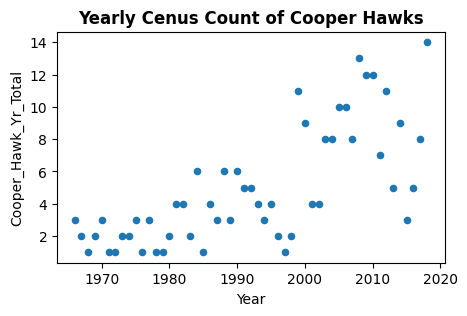

In [31]:
plt.style.use('default')
ax = coop_df.plot(kind='scatter', x='Year', y='Cooper_Hawk_Yr_Total', figsize=(5, 3))
ax.set_title("Yearly Cenus Count of Cooper Hawks", fontweight="bold");

In [0]:
# RED TAIL HAWK
redtail_bird_all_yrs = Kentuck_df[(Kentuck_df.AOU == 3370)]

In [38]:
# should be 738
redtail_bird_all_yrs.shape

(738, 14)

In [0]:
# SORT BY year from 1966 to present
redtail_sorted_df = redtail_bird_all_yrs.sort_values(by='Year', ascending=True)

In [0]:
# resets index on new df
redtail_sorted_df = redtail_sorted_df.reset_index(drop=True)

In [0]:
# makes new index a column important for loop
redtail_sorted_df.reset_index(level=0, inplace=True)

In [36]:
redtail_sorted_df.tail(3)

,index,RouteDataID,CountryNum,StateNum,Route,RPID,Year,AOU,Count10,Count20,Count30,Count40,Count50,StopTotal,SpeciesTotal
735,735,6368263,840,39,35,101,2018,3370,0,2,0,1,1,4,4
736,736,6367740,840,39,6,101,2018,3370,0,0,0,0,1,1,1
737,737,6368121,840,39,31,101,2018,3370,0,2,6,1,0,7,9


In [37]:
# should be 738
redtail_sorted_df.shape

(738, 15)

In [39]:
# Making sure it's only red tail 3370
redtail_sorted_df['AOU'].value_counts().head()

3370    738
Name: AOU, dtype: int64

In [0]:
# Redtail sum checks
# Getting sums for some of the years to check my for loop later
total_nin_six_six = redtail_sorted_df.Year == 1966
total_two_thou = redtail_sorted_df.Year == 2000
total_two_thou_eigh = redtail_sorted_df.Year == 2008
total_two_svteen = redtail_sorted_df.Year == 2017
total_two_eig_teen = redtail_sorted_df.Year == 2018

In [0]:
# getting sums of years above
species_tot_nin_six_six = redtail_sorted_df[total_nin_six_six]
species_tot_two_thou = redtail_sorted_df[total_two_thou]
species_tot_two_thou_eight = redtail_sorted_df[total_two_thou_eigh]
species_tot_two_svn = redtail_sorted_df[total_two_svteen]
species_tot_two_eig_teen = redtail_sorted_df[total_two_eig_teen]

In [42]:
# getting sums of years above 
# should be 5 = 1966, 37 = 2000, 28 = 2008, 57 = 2017, 68 = 2018
print(species_tot_nin_six_six['SpeciesTotal'].sum(axis=0))
print(species_tot_two_thou['SpeciesTotal'].sum(axis=0))
print(species_tot_two_thou_eight['SpeciesTotal'].sum(axis=0))
print(species_tot_two_svn['SpeciesTotal'].sum(axis=0))
print(species_tot_two_eig_teen['SpeciesTotal'].sum(axis=0))

5
37
28
57
68


In [43]:
# Creating an empty Dataframe with column names only
redtail_df = pd.DataFrame(columns=['Year', 'Redtail_ID', 'Red_Tail_Yr_Total'])
redtail_df

,Year,Redtail_ID,Red_Tail_Yr_Total


In [0]:
# This was the last row route ID otherwise it would skip over the last else statement and not append the last row of 2017 data: 6363930
x = 1966
tot = 0
for ind in redtail_sorted_df.index: 
     if (redtail_sorted_df['Year'][ind] == x):
       tot += (redtail_sorted_df['SpeciesTotal'][ind])
       if redtail_sorted_df['index'][ind] == 737:
         redtail_df = redtail_df.append({'Year': int(x), 'Redtail_ID': int(3330), 'Red_Tail_Yr_Total': int(tot)}, ignore_index=True)
         break
     else:
       redtail_df = redtail_df.append({'Year': int(x), 'Redtail_ID': int(3330), 'Red_Tail_Yr_Total': int(tot)}, ignore_index=True)
       x += 1
       tot = 0
       tot += (redtail_sorted_df['SpeciesTotal'][ind])

In [45]:
redtail_df.head()

,Year,Redtail_ID,Red_Tail_Yr_Total
0,1966,3330,5
1,1967,3330,9
2,1968,3330,11
3,1969,3330,7
4,1970,3330,8


In [46]:
# should be 5 = 1966, 37 = 2000, 28 = 2008, 57 = 2017, 68 = 2018
redtail_df.tail(19)

,Year,Redtail_ID,Red_Tail_Yr_Total
34,2000,3330,37
35,2001,3330,50
36,2002,3330,29
37,2003,3330,26
38,2004,3330,17
39,2005,3330,31
40,2006,3330,34
41,2007,3330,46
42,2008,3330,28
43,2009,3330,31


In [0]:
# Make into ints
redtail_df['Year'] = redtail_df['Year'].astype(str).astype(int)
redtail_df['Redtail_ID'] = redtail_df['Redtail_ID'].astype(str).astype(int)
redtail_df['Red_Tail_Yr_Total'] = redtail_df['Red_Tail_Yr_Total'].astype(str).astype(int)

In [48]:
redtail_df.dtypes

Year                 int64
Redtail_ID           int64
Red_Tail_Yr_Total    int64
dtype: object

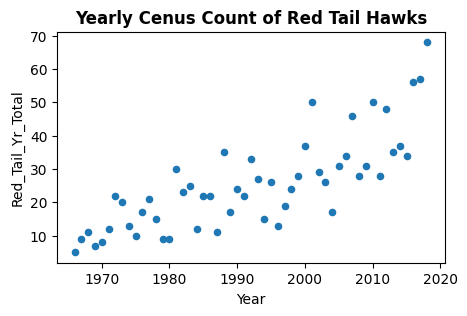

In [49]:
plt.style.use('default')
ax = redtail_df.plot(kind='scatter', x='Year', y='Red_Tail_Yr_Total', figsize=(5,3))
ax.set_title("Yearly Cenus Count of Red Tail Hawks", fontweight="bold");

In [0]:
# RED SHOULDERED HAWK
redshoulder_bird_all_yrs = Kentuck_df[(Kentuck_df.AOU == 3390)]

In [56]:
# should be 411
redshoulder_bird_all_yrs.shape

(411, 14)

In [0]:
# SORT BY year from 1966 to present
redshoulder_sorted_df = redshoulder_bird_all_yrs.sort_values(by='Year', ascending=True)

In [0]:
# reset index
redshoulder_sorted_df = redshoulder_sorted_df.reset_index(drop=True)

In [0]:
# make index a column
redshoulder_sorted_df.reset_index(level=0, inplace=True)

In [54]:
redshoulder_sorted_df.tail()

,index,RouteDataID,CountryNum,StateNum,Route,RPID,Year,AOU,Count10,Count20,Count30,Count40,Count50,StopTotal,SpeciesTotal
406,406,6368144,840,39,9,101,2018,3390,1,0,1,0,0,2,2
407,407,6367292,840,39,2,101,2018,3390,0,1,2,1,0,3,4
408,408,6367580,840,39,145,101,2018,3390,0,0,0,3,1,3,4
409,409,6368469,840,39,10,101,2018,3390,1,1,0,0,0,2,2
410,410,6367824,840,39,3,101,2018,3390,1,2,1,1,1,6,6


In [55]:
# should be 411
redshoulder_sorted_df.shape

(411, 15)

In [0]:
# Red Shoulder sum checks
# Getting sums for some of the years to check my for loop later
total_nin_six_six = redshoulder_sorted_df.Year == 1966
total_two_thou = redshoulder_sorted_df.Year == 2000
total_two_thou_eigh = redshoulder_sorted_df.Year == 2008
total_two_svteen = redshoulder_sorted_df.Year == 2017
total_two_eig_teen = redshoulder_sorted_df.Year == 2018

In [0]:
# getting sums of years above
species_tot_nin_six_six = redshoulder_sorted_df[total_nin_six_six]
species_tot_two_thou = redshoulder_sorted_df[total_two_thou]
species_tot_two_thou_eight = redshoulder_sorted_df[total_two_thou_eigh]
species_tot_two_svn = redshoulder_sorted_df[total_two_svteen]
species_tot_two_eig_teen = redshoulder_sorted_df[total_two_eig_teen]

In [59]:
# getting sums of years above 
# should be 7 = 1966, 15 = 2000, 27 = 2008, 47 = 2017, 62 = 2018
print(species_tot_nin_six_six['SpeciesTotal'].sum(axis=0))
print(species_tot_two_thou['SpeciesTotal'].sum(axis=0))
print(species_tot_two_thou_eight['SpeciesTotal'].sum(axis=0))
print(species_tot_two_svn['SpeciesTotal'].sum(axis=0))
print(species_tot_two_eig_teen['SpeciesTotal'].sum(axis=0))

7
15
27
47
62


In [60]:
# Creating an empty Dataframe with column names only
redshoulder_df = pd.DataFrame(columns=['Year', 'Redshoulder_ID', 'Red_Shoulder_Yr_Total'])
redshoulder_df

,Year,Redshoulder_ID,Red_Shoulder_Yr_Total


In [0]:
# Last row should hit the if statement to append: 6365103
x = 1966
tot = 0
for ind in redshoulder_sorted_df.index: 
     if (redshoulder_sorted_df['Year'][ind] == x):
       tot += (redshoulder_sorted_df['SpeciesTotal'][ind])
       if redshoulder_sorted_df['index'][ind] == 410:
         redshoulder_df = redshoulder_df.append({'Year': int(x), 'Redshoulder_ID': int(3390), 'Red_Shoulder_Yr_Total': int(tot)}, ignore_index=True)
         break
     else:
       redshoulder_df = redshoulder_df.append({'Year': int(x), 'Redshoulder_ID': int(3390), 'Red_Shoulder_Yr_Total': int(tot)}, ignore_index=True)
       x += 1
       tot = 0
       tot += (redshoulder_sorted_df['SpeciesTotal'][ind])

In [62]:
redshoulder_df.head()

,Year,Redshoulder_ID,Red_Shoulder_Yr_Total
0,1966,3390,7
1,1967,3390,8
2,1968,3390,6
3,1969,3390,4
4,1970,3390,8


In [63]:
# should be 7 = 1966, 15 = 2000, 27 = 2008, 47 = 2017, 62 = 2018
redshoulder_df.tail(19)

,Year,Redshoulder_ID,Red_Shoulder_Yr_Total
34,2000,3390,15
35,2001,3390,18
36,2002,3390,15
37,2003,3390,13
38,2004,3390,18
39,2005,3390,22
40,2006,3390,33
41,2007,3390,25
42,2008,3390,27
43,2009,3390,41


In [0]:
# make ints
redshoulder_df['Year'] = redshoulder_df['Year'].astype(str).astype(int)
redshoulder_df['Redshoulder_ID'] = redshoulder_df['Redshoulder_ID'].astype(str).astype(int)
redshoulder_df['Red_Shoulder_Yr_Total'] = redshoulder_df['Red_Shoulder_Yr_Total'].astype(str).astype(int)

In [65]:
redshoulder_df.dtypes

Year                     int64
Redshoulder_ID           int64
Red_Shoulder_Yr_Total    int64
dtype: object

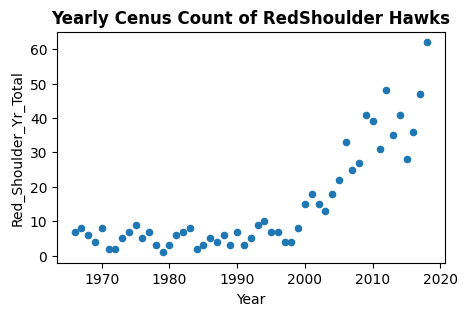

In [66]:
plt.style.use('default')
ax = redshoulder_df.plot(kind='scatter', x='Year', y='Red_Shoulder_Yr_Total', figsize=(5,3))
ax.set_title("Yearly Cenus Count of RedShoulder Hawks", fontweight="bold");

In [67]:
# merging into one df
resulting_df = pd.merge(redtail_df, redshoulder_df, on = ['Year'], how = 'inner')
resulting_df.head()

,Year,Redtail_ID,Red_Tail_Yr_Total,Redshoulder_ID,Red_Shoulder_Yr_Total
0,1966,3330,5,3390,7
1,1967,3330,9,3390,8
2,1968,3330,11,3390,6
3,1969,3330,7,3390,4
4,1970,3330,8,3390,8


In [68]:
# final merge into one df
finished_df = pd.merge(resulting_df, coop_df, on = ['Year'], how = 'inner')
finished_df
# red tail should be 5 = 1966, 37 = 2000, 28 = 2008, 57 = 2017, 68 = 2018
# red shoulder should be 7 = 1966, 15 = 2000, 27 = 2008, 47 = 2017, 62 = 2018
# coopers should be 3 = 1966, 9 = 2000, 13 = 2008, 8 = 2017, 14 = 2018

,Year,Redtail_ID,Red_Tail_Yr_Total,Redshoulder_ID,Red_Shoulder_Yr_Total,Coopers_ID,Cooper_Hawk_Yr_Total
0,1966,3330,5,3390,7,3330,3
1,1967,3330,9,3390,8,3330,2
2,1968,3330,11,3390,6,3330,1
3,1969,3330,7,3390,4,3330,2
4,1970,3330,8,3390,8,3330,3
5,1971,3330,12,3390,2,3330,1
6,1972,3330,22,3390,2,3330,1
7,1973,3330,20,3390,5,3330,2
8,1974,3330,13,3390,7,3330,2
9,1975,3330,10,3390,9,3330,3


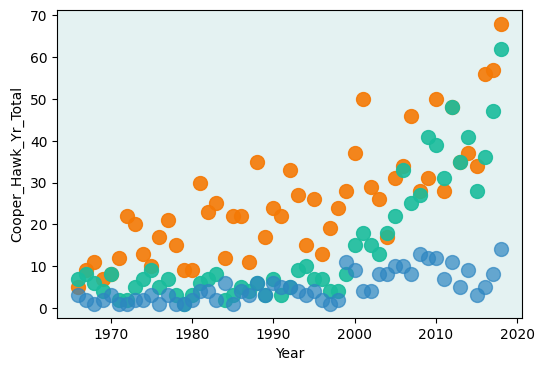

In [69]:
plt.style.use('default')
ax = plt.gca()

finished_df.plot(kind='scatter',x='Year',y='Red_Tail_Yr_Total', c = '#f57905', s = 100, alpha = 0.9, figsize=(6,4), ax=ax)
finished_df.plot(kind='scatter',x='Year',y='Red_Shoulder_Yr_Total', c = '#1ABC9C', s = 100, alpha = 0.9, figsize=(6,4), ax=ax)
finished_df.plot(kind='scatter',x='Year',y='Cooper_Hawk_Yr_Total', c = '#2E86C1', s = 100, alpha = 0.7, figsize=(6,4), ax=ax)
ax.set_facecolor("#e4f2f2")

plt.show()


In [70]:
finished_df.head(2)

,Year,Redtail_ID,Red_Tail_Yr_Total,Redshoulder_ID,Red_Shoulder_Yr_Total,Coopers_ID,Cooper_Hawk_Yr_Total
0,1966,3330,5,3390,7,3330,3
1,1967,3330,9,3390,8,3330,2


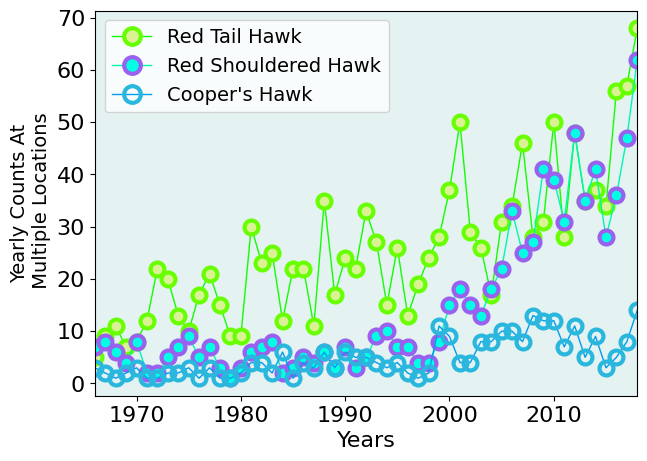

In [71]:
plt.style.use('default')
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(7,5))
finished_df.plot(x='Year', y='Red_Tail_Yr_Total', color="#11ff00", lw=1, ls='-', marker='o', markersize=10, 
        markerfacecolor="#dbf294", markeredgewidth=3, markeredgecolor="#68ff03", ax = ax)
finished_df.plot(x='Year', y='Red_Shoulder_Yr_Total', color="#00f7b1", lw=1, ls='-', marker='o', markersize=10, 
        markerfacecolor="#00ffe5", markeredgewidth=3, markeredgecolor="#9961ed", ax = ax)
finished_df.plot(x='Year', y='Cooper_Hawk_Yr_Total', color="#009cf0", lw=1, ls='-', marker='o', markersize=10, 
        markerfacecolor="none", markeredgewidth=3, markeredgecolor="#2ab7de", ax = ax)
ax.set_facecolor("#e4f2f2")

legend_elements = [Line2D([0], [0], color="#11ff00", lw=1, ls='-', marker='o', markersize=12, 
        markerfacecolor="#dbf294", markeredgewidth=3, markeredgecolor="#68ff03", label='Red Tail Hawk'),
                   Line2D([0], [0], color="#00f7b1", lw=1, ls='-', marker='o', markersize=12, 
        markerfacecolor="#00ffe5", markeredgewidth=3, markeredgecolor="#9961ed", label='Red Shouldered Hawk'),
                  Line2D([0], [0], color="#009cf0", lw=1, ls='-', marker='o', markersize=12, 
        markerfacecolor="none", markeredgewidth=3, markeredgecolor="#2ab7de", label="Cooper's Hawk")]

ax.legend(handles=legend_elements, fontsize = 14)
# Set the x and y axes labels
ax.set_xlabel("Years", fontsize=16)
ax.set_ylabel("Yearly Counts At\n Multiple Locations", fontsize=14)
plt.setp(ax.get_xticklabels(), rotation='horizontal', fontsize=16)
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=16)
plt.show()

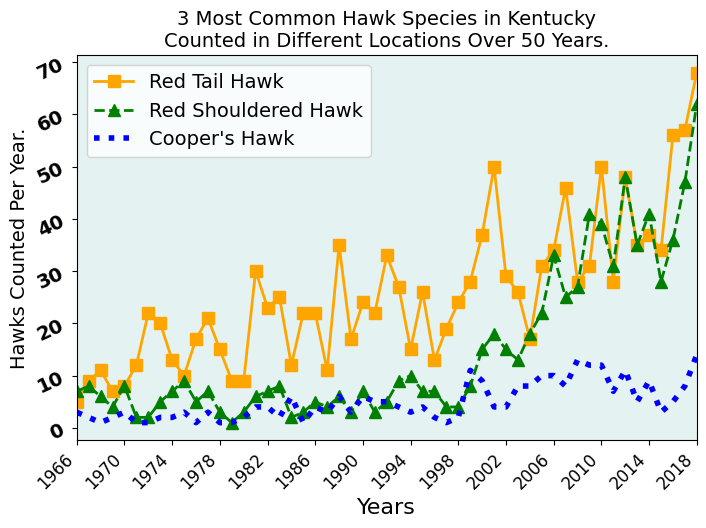

In [74]:
plt.style.use('default')
fig, ax = plt.subplots(figsize = [8,5])
finished_df.plot(x='Year', y='Red_Tail_Yr_Total', color = 'orange', marker ='s', markersize= 8, lw = 2, markerfacecolor= 'orange', markeredgecolor='orange', ax = ax)
finished_df.plot(x='Year', y='Red_Shoulder_Yr_Total', color = 'green', marker ='^', markersize = 8, lw = 2, ls = '--', markerfacecolor= 'green', markeredgecolor= 'g', ax = ax)
finished_df.plot(x='Year', y='Cooper_Hawk_Yr_Total', lw = 4, ls =':', color = 'blue', ax = ax)
ax.set_facecolor("#e4f2f2")


L=plt.legend(fontsize = 14)
L.get_texts()[0].set_text('Red Tail Hawk')
L.get_texts()[1].set_text('Red Shouldered Hawk')
L.get_texts()[2].set_text("Cooper's Hawk")

# Set the x and y axes labels
ax.set_xticks(range(1966, 2020, 4))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='12'  
)

ax.set_yticks(range(0, 75, 10))
plt.yticks(
    rotation=25, 
    horizontalalignment='right',
    fontweight='bold',
    fontsize='14'  
)


# Add title and axis names
plt.title('3 Most Common Hawk Species in Kentucky\nCounted in Different Locations Over 50 Years.', fontsize = 14)
plt.xlabel('Years', fontsize = 16)
plt.ylabel("Hawks Counted Per Year.", fontsize = 14)
fig.show()
plt.savefig('myfigure.png')

In [0]:
# Tried to use for plotly
import chart_studio.plotly as py

In [0]:
# Tried to use for plotly
py.plot(fig, filename = 'hawks', auto_open=True)